In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<ipython-input-1-ac09909db896>:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load Data

In [3]:
br_pd = pd.read_csv('output/br.csv')

In [4]:
score_pd = pd.read_csv('output/score.csv')

In [5]:
sill_pd = pd.read_csv('output/sill.csv')

In [6]:
viscode_pd = pd.read_csv('output/viscode.csv')

In [ ]:
engagement_

### 1-1. Test data

In [7]:
uid = 'b1dfc5c6ec04d46d1823c5fa972ad320'

In [8]:
br_pd[br_pd['userid']==uid]

,userid,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,...,NEXT,NOTGETIT,OPEN,OPEN_RECOMMENDATION,PAGE_JUMP,PREV,REGIST CONTENTS,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO
84,b1dfc5c6ec04d46d1823c5fa972ad320,0,227,21,0,0,31,0,59,0,...,1500,0,86,0,3,832,0,0,0,0


In [9]:
score_pd[score_pd['userid']==uid]

,userid,score
13,b1dfc5c6ec04d46d1823c5fa972ad320,99


In [10]:
sill_pd[sill_pd['userid']==uid]

,userid,#1,#2,#3,#4,#5,#6,#7,#8,#9,...,#39,#40,#41,#42,#43,#44,#45,#46,#47,#48
0,b1dfc5c6ec04d46d1823c5fa972ad320,5,5,5,5,1,1,5,1,5,...,5,1,1,5,5,5,1,1,1,5


In [11]:
viscode_pd[viscode_pd['userid']==uid]

,userid,code_length,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open,AttributeError,ConversionError,...,ModuleNotFoundError,NameError,OperationalError,SyntaxError,TabError,TypeError,UnboundLocalError,UnicodeDecodeError,ValueError,ZeroDivisionError
59,b1dfc5c6ec04d46d1823c5fa972ad320,99,31,61,19,229,1,1,1.0,0.0,...,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0


### 1-2. Data characteristics

In [12]:
score_pd.nunique()

userid    119
score      47
dtype: int64

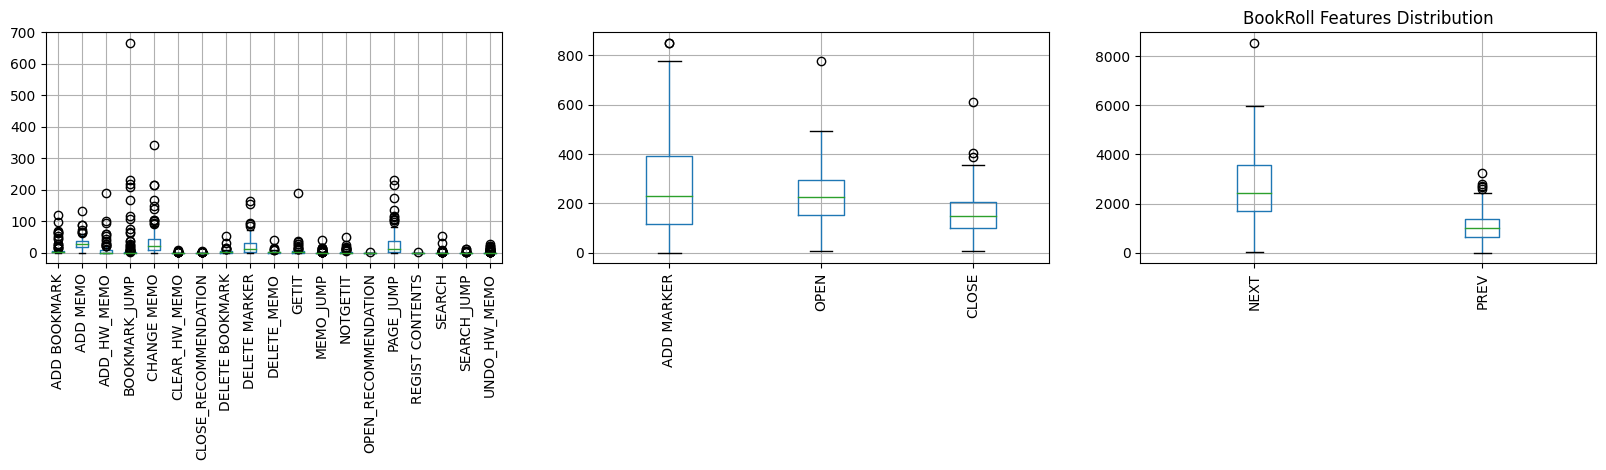

In [13]:
plt.figure(figsize=(20, 3))

plt.subplot(1, 3, 1)
br_pd.drop(['NEXT', 'PREV', 'ADD MARKER', 'OPEN', 'CLOSE'], axis=1).boxplot()
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
br_pd[['ADD MARKER', 'OPEN', 'CLOSE']].boxplot()
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
br_pd[['NEXT', 'PREV']].boxplot()
plt.xticks(rotation=90)

plt.title('BookRoll Features Distribution')

plt.show()

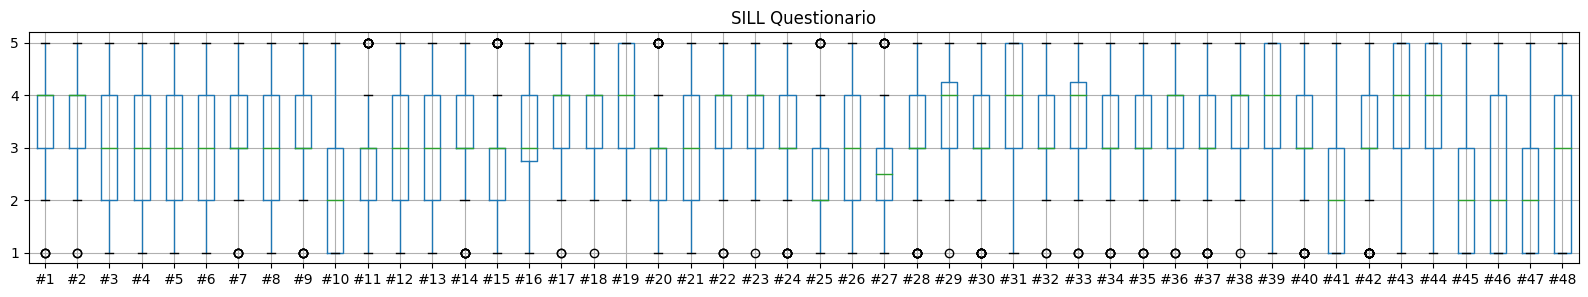

In [14]:
# sill_pd.nunique()

plt.figure(figsize=(20, 3))
sill_pd.boxplot()
plt.title('SILL Questionario')
plt.show()

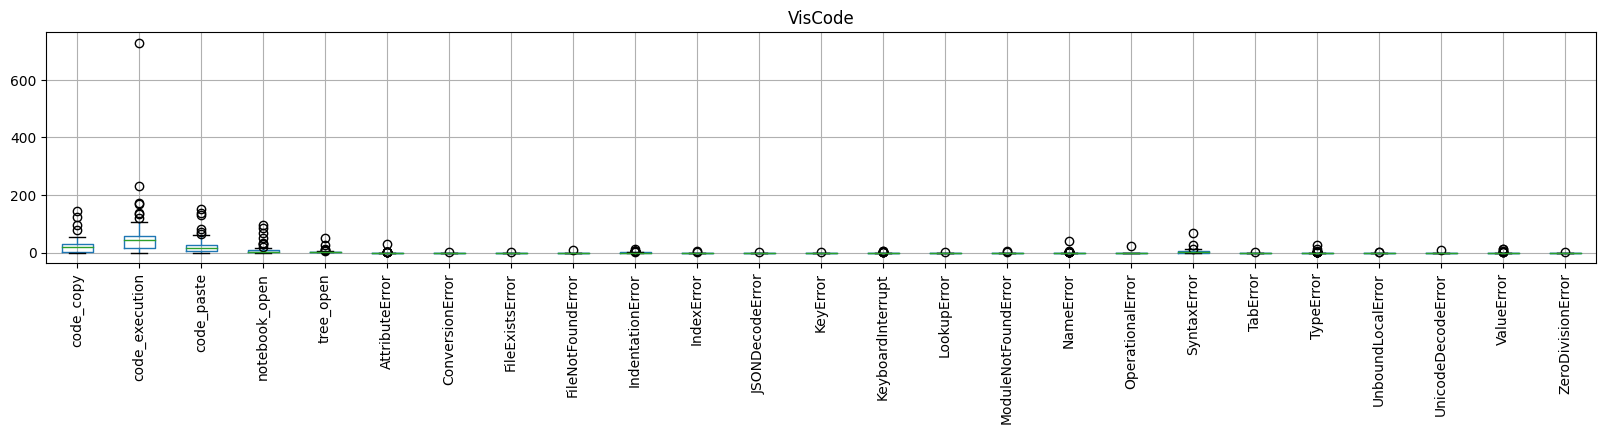

In [15]:
plt.figure(figsize=(20, 3))
viscode_pd.drop(['code_length', 'code_speed'], axis=1).boxplot()

# plt.yscale('log')
plt.xticks(rotation=90)
plt.title('VisCode')
# plt.ylim(bottom=0)
plt.show()

### 1-3. Merge Data sets

In [16]:
score_pd = score_pd.set_index('userid')
sill_pd = sill_pd.set_index('userid')
viscode_pd = viscode_pd.set_index('userid')
br_pd = br_pd.set_index('userid')

In [18]:
# br_grouped = br_pd.groupby(['username', 'operation_name']).size().reset_index()
# br_grouped = br_grouped.pivot_table(0, ['username'], 'operation_name').fillna(0).astype('int')
# br_grouped

In [19]:
merged_pd = pd.concat([br_pd, sill_pd, viscode_pd, score_pd], axis=1)
merged_pd = merged_pd.drop(columns=['REGIST CONTENTS'])

merged_pd = merged_pd[merged_pd['score'].notna()]
merged_pd

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,NameError,OperationalError,SyntaxError,TabError,TypeError,UnboundLocalError,UnicodeDecodeError,ValueError,ZeroDivisionError,score
userid,,,,,,,,,,,,,,,,,,,,,
02d679ad650962b6ae8bf8adbeeb33c1,4.0,188.0,28.0,8.0,4.0,25.0,0.0,38.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
0307ea84b89fceab3b507fec1900ce7e,43.0,464.0,48.0,1.0,116.0,214.0,0.0,328.0,0.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0
0a715a568a054d7996fcbcbf17b36551,1.0,96.0,28.0,14.0,0.0,7.0,0.0,90.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
0c7b9053af0850d3eaa8b61de50a26cd,0.0,336.0,46.0,1.0,0.0,49.0,0.0,199.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0
0cebfa477ed3e2e0c5a3f9aa96c23698,2.0,282.0,89.0,2.0,0.0,140.0,0.0,354.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f65238cddaeec1be538e9c1a5990e48f,12.0,356.0,47.0,2.0,13.0,61.0,0.0,232.0,0.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
f79d398d62d5eaff8d7b1f9f6aaf65ab,0.0,145.0,17.0,0.0,0.0,24.0,0.0,102.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
f83882e0705489c3c0514fe226fdda4f,1.0,33.0,10.0,0.0,0.0,19.0,0.0,184.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


## 2. Data statistics

### 2-1. Correlation matrix

In [24]:
import matplotlib.pyplot as plt

# plt.matshow(merged_pd.corr())
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')
# plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


<ipython-input-25-7f107ba65ed2>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


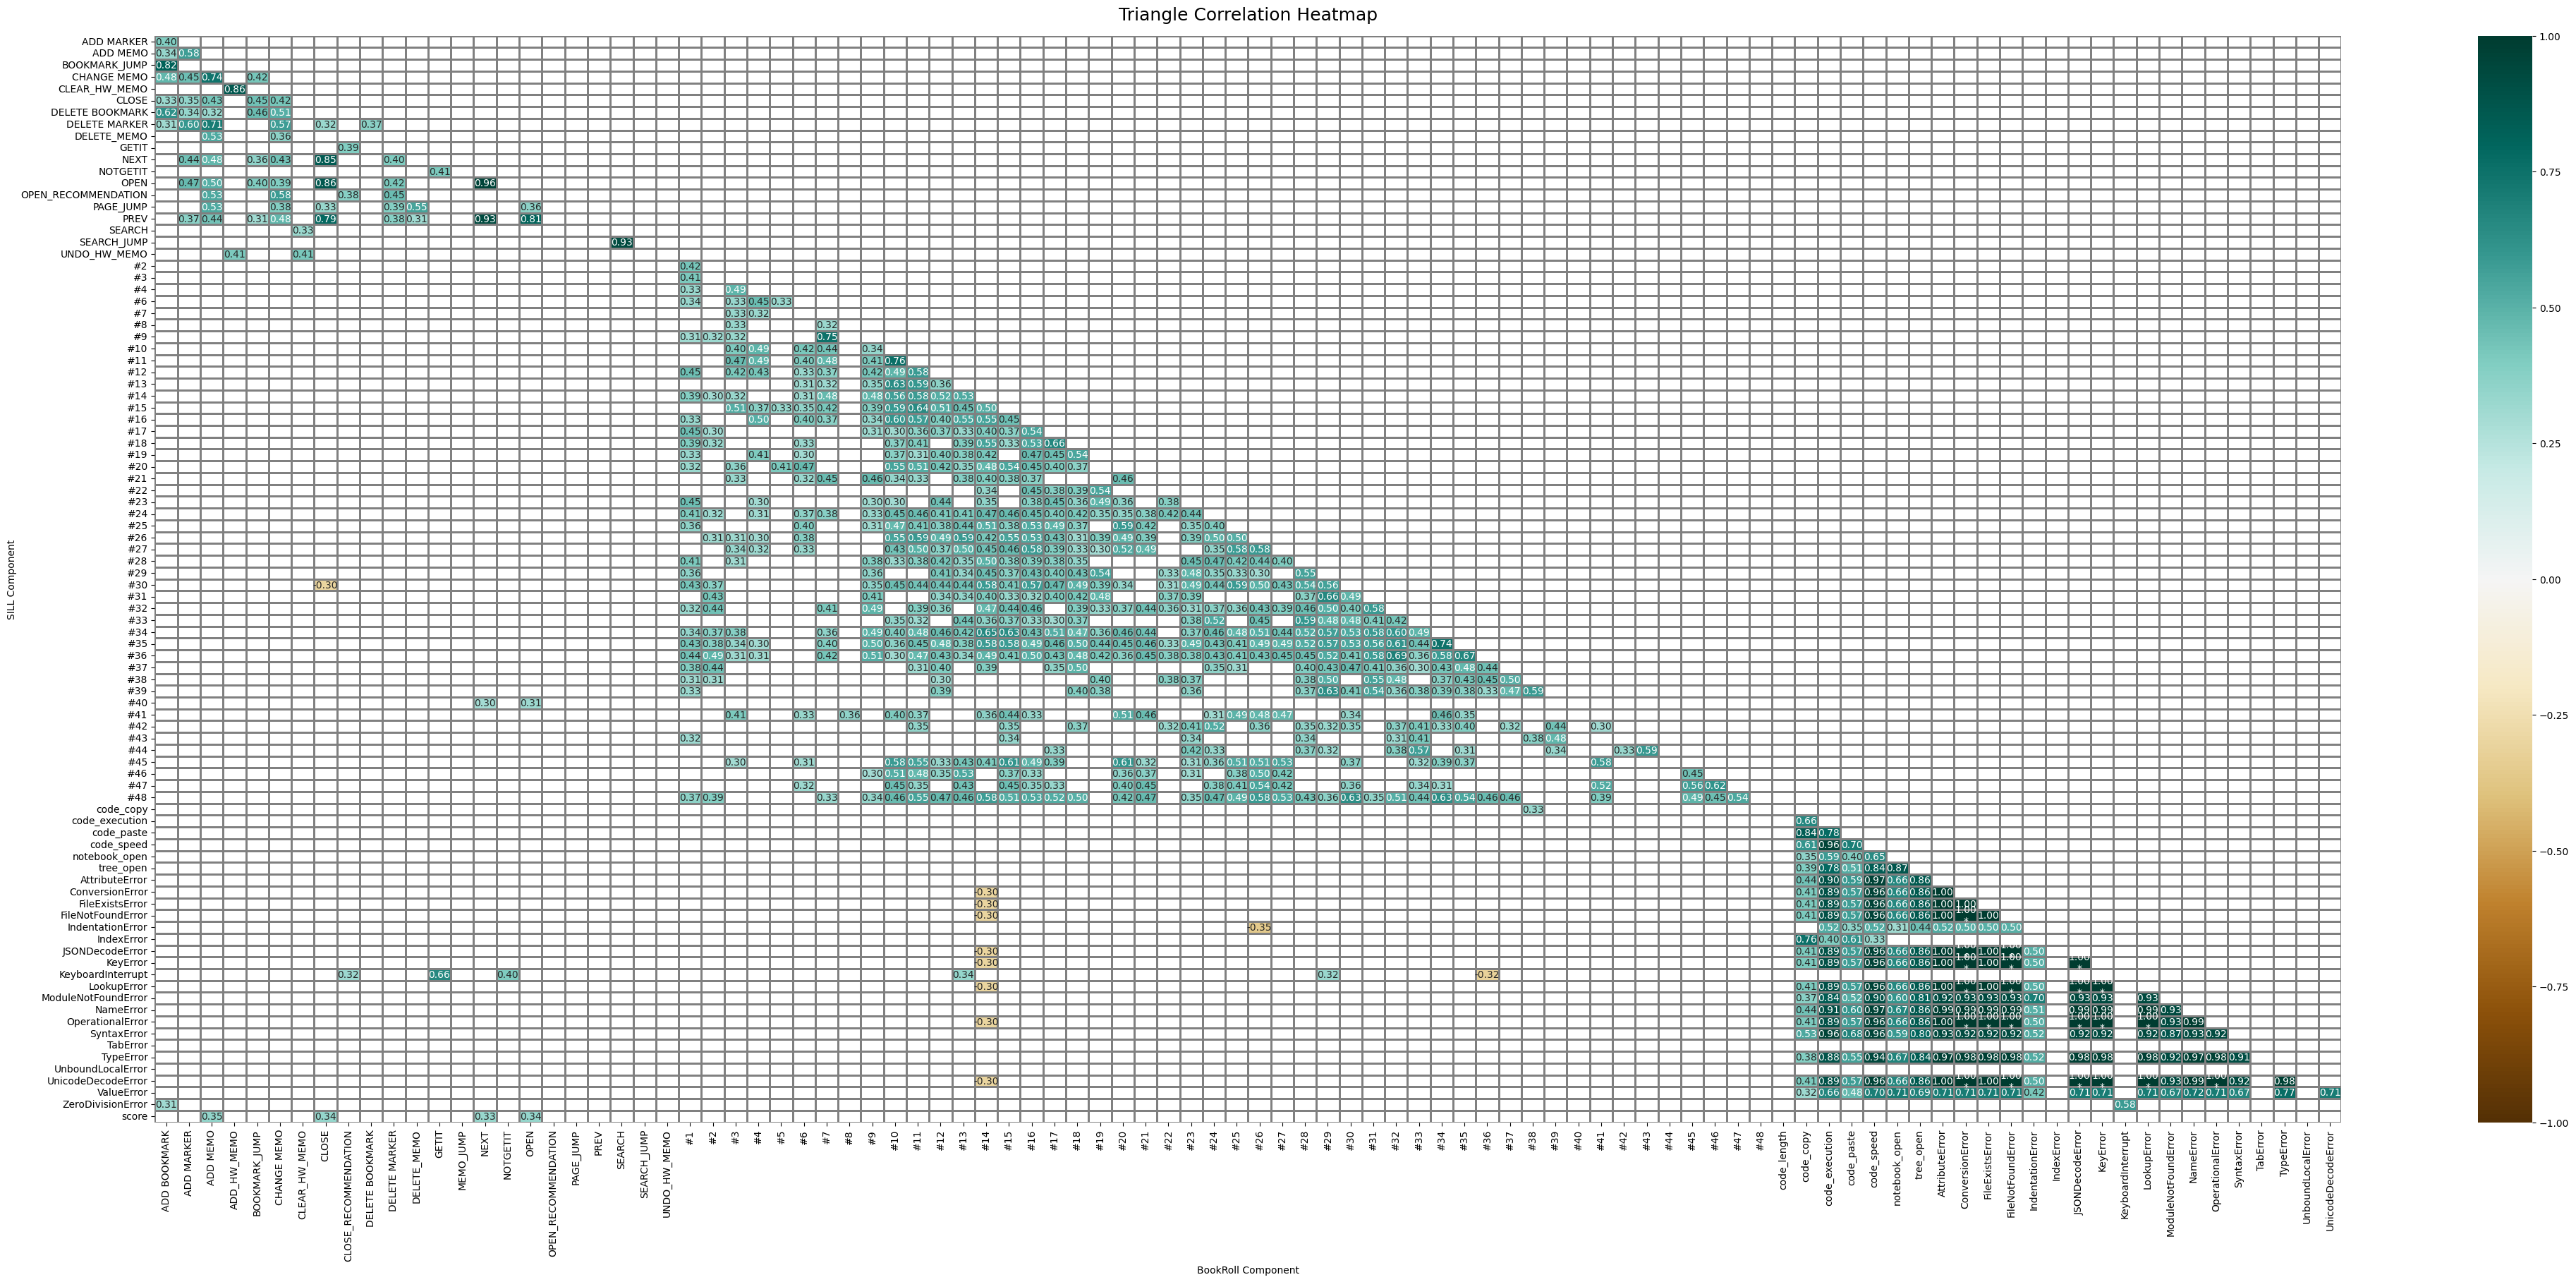

In [25]:
np.random.seed(124)
Correlazioni = pd.DataFrame(np.random.rand(7, 10), columns=[*'abcdefghij'])

plt.figure(figsize=(50, 20))
corr = merged_pd.corr()
# corr = corr_pd

# annot = [[f"{val[0]:.2f}"
#           + ('*' if val[1] < 0.1 else '')  # add one star if abs(val) >= extreme_1
#           + ('*' if val[1] < 0.05 else '')  # add one star if abs(val) >= extreme_1
#           + ('*' if val[1] < 0.005 else '')  # add one star if abs(val) >= extreme_1

#           for val in zip(row[0], row[1])] for row in zip(corr.to_numpy(), corr_pd_p.to_numpy())]


mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.3  # only show cells with abs(correlation) at least this value
extreme_1 = 1  # show with a star
extreme_2 = 2  # show with a second star
extreme_3 = 3  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]
#     annot = pd.DataFrame(annot).iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.2f}"
          + ('' if abs(val) < extreme_1 else '\n*')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '*')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '*')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG', linewidths=1,linecolor='gray')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

heatmap.set_xlabel('BookRoll Component')
heatmap.set_ylabel('SILL Component')

plt.savefig('figures/000_correlation_matrix.png', dpi=300)

plt.show()

### 2-2. Score dist

In [26]:
class_pd = br_pd.groupby(['userid', 'class']).count().reset_index()[['userid', 'class']].set_index('userid')
class_pd.loc[[uid]]

KeyError: 'class'

In [27]:
# pd.concat([class_pd, merged_pd], axis=1)
merged_pd.loc[[uid]]

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,NameError,OperationalError,SyntaxError,TabError,TypeError,UnboundLocalError,UnicodeDecodeError,ValueError,ZeroDivisionError,score
userid,,,,,,,,,,,,,,,,,,,,,
b1dfc5c6ec04d46d1823c5fa972ad320,0.0,227.0,21.0,0.0,0.0,31.0,0.0,59.0,0.0,0.0,...,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,99.0


In [28]:
merged_pd = merged_pd.join(class_pd)

NameError: name 'class_pd' is not defined

In [29]:
plt.figure(figsize=(10, 3))
merged_pd[merged_pd['class']=='a']['score'].hist(bins=10)

plt.ylabel('Numbers')
plt.xlabel('Score')

KeyError: 'class'

In [30]:
plt.figure(figsize=(10, 3))

merged_pd[merged_pd['class']=='b']['score'].hist(bins=10)
plt.ylabel('Numbers')
plt.xlabel('Score')

KeyError: 'class'

### 2-3. PCA Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plt_pca (X_train, title, threshold):
    sc = StandardScaler()

    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    # X_test_std = sc.transform(X_test)
    #
    # Instantiate PCA
    #
    pca = PCA()
    #
    # Determine transformed features
    #
    X_train_pca = pca.fit_transform(X_train_std)
    #
    # Determine explained variance using explained_variance_ration_ attribute
    #
    exp_var_pca = pca.explained_variance_ratio_
    #
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    comp = pca.components_
    
#     threshold=0.9
    running_sum = 0
    for index, entry in enumerate(exp_var_pca.flat):
        running_sum += entry
        if running_sum > threshold:
            break
    if running_sum < threshold:
        index = -1 #if the sum never reaches the threshold
    
    #
    # Create the visualization plot
    #
    plt.title(title + ', threshold='+str(threshold)+', comp='+str(index))
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.2, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    
    plt.savefig('figures/000_'+title+'.png', dpi=300)
    
    plt.show()
    
    return X_train_pca[:,0:index], comp[:,0:index]

In [ ]:
# pca = PCA()
# #
# # Determine transformed features
# #
# X_train_pca = pca.fit_transform(sill_pd)
# #
# # Determine explained variance using explained_variance_ration_ attribute
# #
# exp_var_pca = pca.explained_variance_ratio_

In [ ]:

index = br_grouped.index.intersection(sill_pd.index.intersection(viscode_pd.index))

sill_pca_np, sill_comp = plt_pca(sill_pd.loc[index], 'SILL PCA', 0.9)
br_pca_np, br_comp = plt_pca(br_grouped.loc[index], 'BookRoll PCA', 0.9)
viscode_pca_np, viscode_comp = plt_pca(viscode_pd.loc[index], 'VisCode PCA', 0.9)

In [ ]:
def get_corr (a, b):
    
    from scipy import stats
    from scipy.stats import pearsonr
    
    corr_pd = pd.DataFrame()
    corr_pd_p = pd.DataFrame()

    for i in range(0, pd.DataFrame(a).shape[1]):

        for j in range(0, pd.DataFrame(b).shape[1]):

            corr_pd.at[i,j] = pearsonr(pd.DataFrame(b)[j], pd.DataFrame(a)[i])[0]
            corr_pd_p.at[i,j] = pearsonr(pd.DataFrame(b)[j], pd.DataFrame(a)[i])[1]
            
    return corr_pd, corr_pd_p
    

In [ ]:
def plot_corr (corr_pd, p_value_pd, thr, xtick_list, ytick_list, filename):
    
    plt.figure(figsize=(30, 10))
    # corr = Correlazioni.corr()
#     corr = corr_pd

    annot = [[f"{val[0]:.2f}"
              + ('*' if val[1] < 0.1 else '')  # add one star if abs(val) >= extreme_1
              + ('*' if val[1] < 0.05 else '')  # add one star if abs(val) >= extreme_1
              + ('*' if val[1] < 0.005 else '')  # add one star if abs(val) >= extreme_1

              for val in zip(row[0], row[1])] for row in zip(corr_pd.to_numpy(), p_value_pd.to_numpy())]


    mask = np.triu(np.ones_like(corr_pd, dtype=np.bool))
    cut_off = thr  # only show cells with abs(correlation) at least this value
#     extreme_1 = 0.75  # show with a star
#     extreme_2 = 0.85  # show with a second star
#     extreme_3 = 0.90  # show with a third star
#     mask |= np.abs(corr_pd) < cut_off
#     corr_pd = corr_pd[~mask]  # fill in NaN in the non-desired cells
    
    mask = corr_pd.mask(corr_pd<thr)

    remove_empty_rows_and_cols = True
    if remove_empty_rows_and_cols:
#         wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
#         wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
        wanted_cols = np.flatnonzero(np.count_nonzero(mask, axis=1))
        wanted_rows = np.flatnonzero(np.count_nonzero(mask, axis=0))
        corr_pd = corr_pd.iloc[wanted_cols, wanted_rows]
        annot = pd.DataFrame(annot).iloc[wanted_cols, wanted_rows]

    # annot = [[f"{val:.4f}"
    #           + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
    #           + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
    #           + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
    #           for val in row] for row in corr.to_numpy()]

    heatmap = sns.heatmap(mask, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG', linewidths=1, linecolor='gray')
#     heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

#     print('wanted_cols:', wanted_cols)
#     print('wanted_rows:', wanted_rows)
    
    plt.yticks(np.arange(len(list(wanted_cols))), [ytick_list[i] for i in wanted_cols], rotation=0, verticalalignment='top')
    plt.xticks(np.arange(len(list(wanted_rows))), [xtick_list[i] for i in wanted_rows], rotation=90, horizontalalignment='left')

#     heatmap.set_xlabel('BookRoll Component')
#     heatmap.set_ylabel('SILL Component')
    plt.tight_layout()
#     plt.savefig('figures/'+filename, dpi=300)

#     plt.show()
    return heatmap
    
    

In [ ]:
test_pd = pd.concat([sill_pd, score_pd], axis=1).dropna()

# test_pd = test_pd[test_pd['score']>95]
# test_pd = test_pd[(test_pd['score']<95) & (test_pd['score']>90)]
# test_pd = test_pd[(test_pd['score']<90) & (test_pd['score']>80)]
test_pd = test_pd[test_pd['score']<80]

corr_pd, corr_pd_p = get_corr (test_pd.values, test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, 0.3, list(test_pd), list(test_pd), 'test')
heatmap.set_title('SILL Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('SILL Questions')
heatmap.set_ylabel('SILL Questions')

In [ ]:

test_pd = pd.concat([br_grouped, score_pd], axis=1).dropna()
# test_pd = test_pd[test_pd['score']>95]
# test_pd = test_pd[(test_pd['score']<95) & (test_pd['score']>90)]
# test_pd = test_pd[(test_pd['score']<90) & (test_pd['score']>80)]
test_pd = test_pd[test_pd['score']<80]

corr_pd, corr_pd_p = get_corr (test_pd.values, test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, 0.5, list(test_pd), list(test_pd), 'test')

heatmap.set_title('BookRoll Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('BookRoll Actions')
heatmap.set_ylabel('BookRoll Actions')

In [ ]:
test_pd = pd.concat([viscode_pd, score_pd], axis=1).dropna()
# test_pd = test_pd[test_pd['score']>95]
# test_pd = test_pd[(test_pd['score']<95) & (test_pd['score']>90)]
# test_pd = test_pd[(test_pd['score']<90) & (test_pd['score']>80)]
test_pd = test_pd[test_pd['score']<80]

corr_pd, corr_pd_p = get_corr (test_pd.values, test_pd.values)

heatmap = plot_corr (corr_pd, corr_pd_p, 0.5, list(test_pd), list(test_pd), 'test')
heatmap.set_title('VisCode Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('VisCode Questions')
heatmap.set_ylabel('VisCode Questions')

In [ ]:
sill_test_pd = pd.concat([sill_pd, score_pd], axis=1).dropna()
br_test_pd = pd.concat([br_grouped, score_pd], axis=1).dropna()

index = br_test_pd.index.intersection(sill_test_pd.index)
sill_test_pd = sill_test_pd.loc[index]
br_test_pd = br_test_pd.loc[index]

level=0
if level==0:
    br_test_pd = br_test_pd[br_test_pd['score']>95]
    sill_test_pd = sill_test_pd[sill_test_pd['score']>95]
elif level == 1:
    br_test_pd = br_test_pd[(br_test_pd['score']<95) & (br_test_pd['score']>90)]
    sill_test_pd = sill_test_pd[(sill_test_pd['score']<95) & (sill_test_pd['score']>90)]
elif level == 2:
    br_test_pd = br_test_pd[(br_test_pd['score']<90) & (br_test_pd['score']>80)]
    sill_test_pd = sill_test_pd[(sill_test_pd['score']<90) & (sill_test_pd['score']>80)]
else:
    br_test_pd = br_test_pd[br_test_pd['score']<80]
    sill_test_pd = sill_test_pd[sill_test_pd['score']<80]

cutoff=0.1
corr_pd, corr_pd_p = get_corr (br_test_pd.values, sill_test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, cutoff, list(sill_test_pd), list(br_test_pd), 'test')
heatmap.set_title('SILL / BookRoll Correlation Heatmap, cutoff:'+str(cutoff)+', level='+str(level), fontdict={'fontsize': 18}, pad=16)
heatmap.set_ylabel('BookRoll Actions')
heatmap.set_xlabel('SILL Questions')

In [ ]:
sill_test_pd = pd.concat([sill_pd, score_pd], axis=1).dropna()
viscode_test_pd = pd.concat([viscode_pd, score_pd], axis=1).dropna()

index = viscode_test_pd.index.intersection(sill_test_pd.index)
sill_test_pd = sill_test_pd.loc[index]
viscode_test_pd = viscode_test_pd.loc[index]

level=0
if level==0:
    viscode_test_pd = viscode_test_pd[viscode_test_pd['score']>95]
    sill_test_pd = sill_test_pd[sill_test_pd['score']>95]
elif level == 1:
    viscode_test_pd = viscode_test_pd[(viscode_test_pd['score']<95) & (viscode_test_pd['score']>90)]
    sill_test_pd = sill_test_pd[(sill_test_pd['score']<95) & (sill_test_pd['score']>90)]
elif level == 2:
    viscode_test_pd = viscode_test_pd[(viscode_test_pd['score']<90) & (viscode_test_pd['score']>80)]
    sill_test_pd = sill_test_pd[(sill_test_pd['score']<90) & (sill_test_pd['score']>80)]
else:
    viscode_test_pd = viscode_test_pd[viscode_test_pd['score']<80]
    sill_test_pd = sill_test_pd[sill_test_pd['score']<80]

cutoff = 0.8

corr_pd, corr_pd_p = get_corr (viscode_test_pd.values, sill_test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, cutoff, list(sill_test_pd), list(viscode_test_pd), 'test')
heatmap.set_title('SILL / VisCode Correlation Heatmap, cutoff='+str(cutoff)+', level='+str(level), fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('SILL Actions')
heatmap.set_ylabel('VisCode Questions')

In [ ]:
br_test_pd = pd.concat([br_grouped, score_pd], axis=1).dropna()
viscode_test_pd = pd.concat([viscode_pd, score_pd], axis=1).dropna()

index = br_test_pd.index.intersection(viscode_test_pd.index)
br_test_pd = br_test_pd.loc[index]
viscode_test_pd = viscode_test_pd.loc[index]

level=3
if level==0:
    viscode_test_pd = viscode_test_pd[viscode_test_pd['score']>95]
    br_test_pd = br_test_pd[br_test_pd['score']>95]
elif level == 1:
    viscode_test_pd = viscode_test_pd[(viscode_test_pd['score']<95) & (viscode_test_pd['score']>90)]
    br_test_pd = br_test_pd[(br_test_pd['score']<95) & (br_test_pd['score']>90)]
elif level == 2:
    viscode_test_pd = viscode_test_pd[(viscode_test_pd['score']<90) & (viscode_test_pd['score']>80)]
    br_test_pd = br_test_pd[(br_test_pd['score']<90) & (br_test_pd['score']>80)]
else:
    viscode_test_pd = viscode_test_pd[viscode_test_pd['score']<80]
    br_test_pd = br_test_pd[br_test_pd['score']<80]

cutoff = 0.8
corr_pd, corr_pd_p = get_corr (viscode_test_pd.values, br_test_pd.values)
heatmap = plot_corr (corr_pd, corr_pd_p, cutoff, list(br_test_pd), list(viscode_test_pd), 'test')
heatmap.set_title('BookRoll / VisCode Correlation Heatmap, cutoff='+str(cutoff)+', level='+str(level), fontdict={'fontsize': 18}, pad=16)
heatmap.set_xlabel('BookRoll Actions')
heatmap.set_ylabel('VisCode Actions')

In [ ]:
plt.figure(figsize=(16, 6))

corr = pd.DataFrame(viscode_comp)


mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.3  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]


annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG', linewidths=1,linecolor='gray')
heatmap.set_title('VisCode', fontdict={'fontsize': 18}, pad=16)

y_list = list(viscode_pd)
plt.yticks(np.arange(len(list(wanted_cols))), [y_list[i] for i in wanted_cols], rotation=0)

heatmap.set_xlabel('Components')
heatmap.set_ylabel('Actions')
plt.tight_layout()
plt.savefig('figures/004_viscode_comp.png', dpi=300)

plt.show()

In [ ]:
# wanted_cols

y_list = list(viscode_pd)
[y_list[i] for i in wanted_cols]

## 3. Predict risk student

In [ ]:
merged_pd['label']=0
merged_pd.loc[merged_pd['score'] > 90, 'label']=1
merged_pd

In [ ]:
xa = merged_pd[merged_pd['class']=='a'].drop(columns=['score', 'label', 'class'])
xb = merged_pd[merged_pd['class']=='b'].drop(columns=['score', 'label', 'class'])

ya = merged_pd[merged_pd['class']=='a']['label']
yb = merged_pd[merged_pd['class']=='b']['label']

In [ ]:
merged_pd[merged_pd['class']=='a']['label'].shape

In [ ]:
def normalization (normal_df):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    feature_names = list(normal_df)
    
    min_max_scaler = min_max_scaler.fit(normal_df.values)
    X_raw_minmax = min_max_scaler.transform(normal_df.values)
    normal_df = pd.DataFrame(X_raw_minmax, columns=feature_names)

    return normal_df, min_max_scaler

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
_, normalizer = normalization(xa)
xa_norm = normalizer.transform(xa)
xb_nrom = normalizer.transform(xb)

In [ ]:
pca = PCA(n_components=2)
pca.fit(xa_norm)
xa_pca = pca.transform(xa_norm)
xb_pca = pca.transform(xb_nrom)

In [ ]:
svc_classa = SVC(kernel='rbf')
svc_classa.fit(xa_pca, ya)

In [ ]:
y_pred = svc_classa.predict(xa_pca)

print(confusion_matrix(ya, y_pred))
print(classification_report(ya, y_pred))

In [ ]:
y_pred = svc_classa.predict(xb_pca)

print(confusion_matrix(yb, y_pred))
print(classification_report(yb, y_pred))

In [ ]:
_, normalizer = normalization(xb)
xa_norm = normalizer.transform(xa)
xb_norm = normalizer.transform(xb)

In [ ]:
pca = PCA(n_components=2)
pca.fit(xb_norm)
xa_pca = pca.transform(xa_norm)
xb_pca = pca.transform(xb_nrom)

In [ ]:
svc_classb = SVC(kernel='rbf')
svc_classb.fit(xb_pca, yb)

In [ ]:
y_pred = svc_classb.predict(xb_pca)

print(confusion_matrix(yb, y_pred))
print(classification_report(yb, y_pred))

In [ ]:
y_pred = svc_classb.predict(xa_pca)

print(confusion_matrix(ya, y_pred))
print(classification_report(ya, y_pred))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

ax1.scatter(xa_pca[:,0], xa_pca[:,1], alpha=0.2, label='label=1')
ax1.legend()
ax1.set_title('Class A')

ax2.scatter(xb_pca[:,0], xb_pca[:,1], alpha=0.2, label='label=2')
ax2.legend()
ax2.set_title('Class B')

ax3.scatter(xa_pca[:,0], xa_pca[:,1], label='Class A')
ax3.scatter(xb_pca[:,0], xb_pca[:,1], label='Class B')
ax3.legend()
ax3.set_title('Mix')